In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
fraud = df[df['Class']==1]
no_fraud = df[df['Class']==0]

In [11]:
fraud.count()


Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

since the fraud data is less than 1% of the total data so we have to upsample the fradualent data


In [12]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

In [13]:
upsampled_fraud = resample(fraud,replace=True,n_samples=no_fraud.shape[0],random_state = 1)
upsampled_data = pd.concat([upsampled_fraud,no_fraud])
upsampled_data= upsampled_data.sample(frac=1)

In [14]:
upsampled_data.Class.value_counts()

Class
1    284315
0    284315
Name: count, dtype: int64

In [15]:
X = upsampled_data.drop(columns="Class")
y = upsampled_data['Class']

In [16]:
scaler=MinMaxScaler()
scaler.fit(X)
X.loc[:,:] = scaler.transform(X.loc[:,:])

In [17]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79835,0.336815,0.964077,0.788522,0.789286,0.420914,0.762608,0.251437,0.253159,0.791271,0.382032,...,0.583745,0.566312,0.482821,0.662646,0.337867,0.619014,0.434936,0.426721,0.319594,6.811682e-05
234705,0.856949,0.920592,0.774938,0.742830,0.514574,0.792190,0.231993,0.255134,0.794665,0.353329,...,0.590538,0.568209,0.471902,0.665007,0.385700,0.531550,0.423310,0.424139,0.310458,0.000000e+00
14908,0.151604,0.935905,0.768576,0.865630,0.158140,0.766821,0.262083,0.263663,0.776867,0.431115,...,0.578182,0.572191,0.489208,0.663108,0.333999,0.570152,0.322645,0.416556,0.311519,5.838584e-04
154684,0.593615,0.470560,1.000000,0.354712,0.777010,0.637918,0.328111,0.000000,0.345109,0.003924,...,0.698016,0.193973,0.897985,0.746612,0.385448,0.492184,0.401726,0.311628,0.304212,3.892389e-07
32143,0.212145,0.941247,0.779462,0.859039,0.249526,0.765660,0.259076,0.268882,0.786404,0.480162,...,0.583298,0.556695,0.487315,0.662930,0.365612,0.584960,0.471844,0.426192,0.319210,2.845337e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131143,0.460137,0.979303,0.770748,0.842564,0.282989,0.763218,0.252294,0.266017,0.783096,0.463225,...,0.579709,0.556966,0.471529,0.667200,0.429290,0.590055,0.440625,0.416064,0.313791,4.666975e-04
154454,0.587973,0.973806,0.779344,0.757652,0.344658,0.762531,0.242053,0.255174,0.786398,0.474416,...,0.585685,0.567950,0.506069,0.662498,0.344064,0.599663,0.335031,0.426040,0.318620,5.755676e-03
268918,0.945906,0.988321,0.763897,0.831554,0.324842,0.763075,0.260667,0.265004,0.784318,0.496850,...,0.579644,0.554141,0.457250,0.670758,0.373937,0.559700,0.243343,0.417437,0.312842,3.495366e-03
134436,0.467661,0.946668,0.772667,0.850051,0.224697,0.773931,0.252563,0.271670,0.783075,0.438883,...,0.581325,0.557332,0.464107,0.666721,0.319142,0.560395,0.419493,0.417103,0.316035,1.321466e-03


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

2024-07-18 21:07:37.232924: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 21:07:37.233085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 21:07:37.405417: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
ann_model = Sequential([Dense(120, activation = "relu" , kernel_regularizer = regularizers.l1_l2(l1= 1e-5, l2 = 1e-4)),Dense(45, activation = "relu" , kernel_regularizer = regularizers.l1_l2(l1= 1e-5, l2 = 1e-4)),Dense(1,activation ="sigmoid")])
ann_model.compile(optimizer="adam", loss ='binary_crossentropy',metrics=['accuracy'])
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=1,shuffle= True)

In [21]:
history = ann_model.fit(X_train,y_train, epochs = 15,validation_split = 0.3,batch_size = 40 )

Epoch 1/15
6966/6966 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9257 - loss: 0.2151 - val_accuracy: 0.9365 - val_loss: 0.1757
Epoch 2/15
6966/6966 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9419 - loss: 0.1597 - val_accuracy: 0.9453 - val_loss: 0.1417
Epoch 3/15
6966/6966 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9467 - loss: 0.1450 - val_accuracy: 0.9493 - val_loss: 0.1385
Epoch 4/15
6966/6966 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9480 - loss: 0.1390 - val_accuracy: 0.9515 - val_loss: 0.1262
Epoch 5/15
6966/6966 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9512 - loss: 0.1295 - val_accuracy: 0.9519 - val_loss: 0.1187
Epoch 6/15
6966/6966 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9539 - loss: 0.1228 - val_accuracy: 0.9550 - val_loss: 0.1228
Epoch 7/15
6966/6966 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9566 - loss: 0.1162 - val_accuracy: 0.9636 - val_loss: 0.1073
Epoch 8/15
6966/6966 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9593 - loss: 0

In [24]:
ann_model.evaluate(X_test,y_test)

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9683 - loss: 0.0859


[0.08749363571405411, 0.9676356911659241]

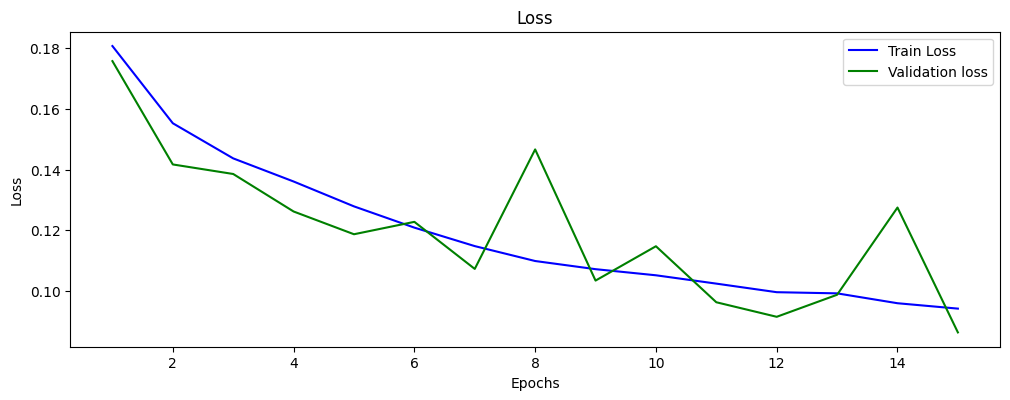

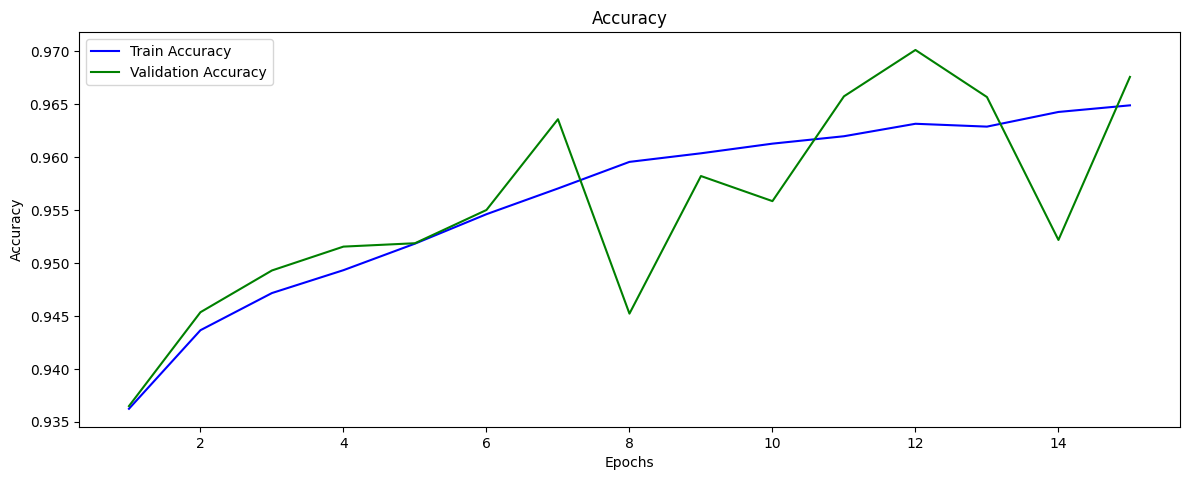

In [25]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(epochs,train_loss,'b',label="Train Loss")
plt.plot(epochs,val_loss,'g',label="Validation loss")
plt.title("Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(12,9))
plt.subplot(2,1,2)
plt.plot(epochs,train_acc,'b',label="Train Accuracy")
plt.plot(epochs,val_acc,'g',label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [26]:
y_predicted = ann_model.predict(X_test)
y_predicted = (y_predicted>0.5)

print(classification_report(y_test,y_predicted))

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85278
           1       0.98      0.96      0.97     85311

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



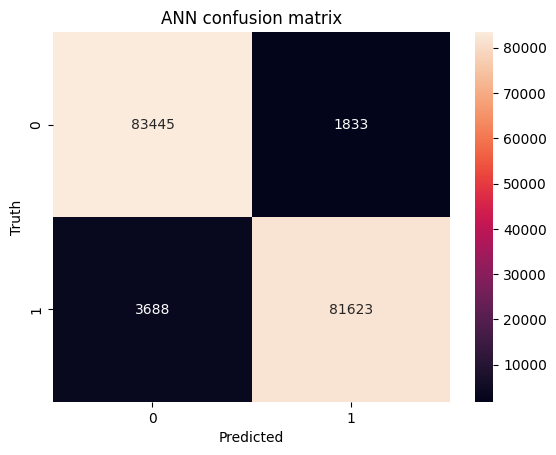

In [27]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("ANN confusion matrix")
plt.show()